# Imports
Start by importing the network module and the needed libraries:

In [1]:
import numpy as np
import random
import time
import utilsDemo
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from ClassifierDemo import Network
from utilsDemo import println
import pandas as pd
from sklearn.metrics import confusion_matrix

# Churn Test
* The file Churn_Modelling.csv contains 10k samples of customers
* There are som 10 features and whether the cust churned or not

Getting the data ready:

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values


# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
# - Taka care of the dummy variable trap:
X = X[:, 1:]


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Initiating and training the demo classifier:

In [26]:
# - Setting the parameters:
input_size   = len(X_test[0])
hidden_count = 1
hidden_size  = 6
output_size  = 2
stupid_reward = 0 # use weighted reward by default
print()
print("Creating a network...")
sampleNetwork = Network(input_size,
                        hidden_size,
                        output_size,
                        hidden_count)
print("Done!")
print(sampleNetwork)

epochs = 2

# - Prepare the grapth data:
accuracy = []
step = []
Fps  = []
Fns  = []
learning_rate = []
learning_rate.append(accuracy)
learning_rate.append(step)
learning_rate.append(Fps)
learning_rate.append(Fns)

# - Start the training:
for epoch_numb in range(epochs):
    y_pred = []
    score_list = [0]*100
    for test_numb in range(len(X_train)):
        # - Get input:
        X_train[test_numb]
        input_ = X_train[test_numb]
        
        # - Input to the neural net:
        sampleNetwork.getInputAndPropagate(input_)
        
        # - Get the output:
        output = sampleNetwork.returnOutputPlace()
        y_pred.append(output)
        
        # - Compare with the y_train output:
        if stupid_reward == 1:
            if y_train[test_numb] == output:
                feedback =  0.5
            else:
                feedback = -0.5
        elif stupid_reward == 0:
            if y_train[test_numb] == 1:
                # Max punishment for false positives (max=0.5)
                if output == 1:
                    feedback = 0.5
                else:
                    feedback = -0.5
            if y_train[test_numb] == 0:
                # Adjust smart reward here:
                if output == 0:
                    feedback = 0.4
                else:
                    feedback = -0.4
        
        # - Feedback:
        sampleNetwork.rewardAndUpdate(feedback)
        

        
        # - Calculate score (% of right answers):
        if feedback > 0:
            new_score = 1
        else:
            new_score = 0
        score_list.append(new_score)
        score_list.pop(0)
        

        
        # - Every Nth turn:
        Nth_turn = 100
        if test_numb % Nth_turn == 0 and test_numb != 0 and test_numb != Nth_turn:
        
            # Conf matrix:
            cm = confusion_matrix(y_train[:len(y_pred)], y_pred)
            total_error = (cm[1][0]+cm[0][1]) / np.sum(cm)
            false_positives = cm[1][0]/ (cm[1][0]+cm[1][1])
            false_negatives = cm[0][1]/ (cm[0][0]+cm[0][1])
        
            correctness = np.mean(score_list)
        
            # - Append the learning rate list:
            learning_rate[0].append(total_error)
            try:
                learning_rate[1].append(np.mean(learning_rate[1][-1]+Nth_turn))
            except:
                learning_rate[1].append(0)
            learning_rate[2].append(false_positives)
            learning_rate[3].append(false_negatives)
                
            # - Print data:
            println(3)
            print("Epoch  :", epoch_numb)
            print("Test   :", test_numb)
            print("Error %:", total_error*100)
            print("- False positives %:", false_positives*100)
            print("- False negatives %:", false_negatives*100)


Creating a network...
Done!
NN dims: 11 -> 1x6 -> 2
 
 
 
Epoch  : 0
Test   : 200
Error %: 32.33830845771145
- False positives %: 61.111111111111114
- False negatives %: 26.060606060606062
 
 
 
Epoch  : 0
Test   : 300
Error %: 32.89036544850498
- False positives %: 59.64912280701754
- False negatives %: 26.639344262295083
 
 
 
Epoch  : 0
Test   : 400
Error %: 30.673316708229425
- False positives %: 59.210526315789465
- False negatives %: 24.0
 
 
 
Epoch  : 0
Test   : 500
Error %: 31.736526946107784
- False positives %: 59.04761904761905
- False negatives %: 24.494949494949495
 
 
 
Epoch  : 0
Test   : 600
Error %: 31.281198003327788
- False positives %: 56.060606060606055
- False negatives %: 24.307036247334754
 
 
 
Epoch  : 0
Test   : 700
Error %: 30.24251069900143
- False positives %: 54.666666666666664
- False negatives %: 23.593466424682397
 
 
 
Epoch  : 0
Test   : 800
Error %: 30.586766541822723
- False positives %: 56.14035087719298
- False negatives %: 23.65079365079365
 


 
 
 
Epoch  : 0
Test   : 6500
Error %: 28.22642670358406
- False positives %: 41.64156626506024
- False negatives %: 24.78252464720665
 
 
 
Epoch  : 0
Test   : 6600
Error %: 28.29874261475534
- False positives %: 41.937869822485204
- False negatives %: 24.785673461611736
 
 
 
Epoch  : 0
Test   : 6700
Error %: 28.294284435158936
- False positives %: 42.170429715950476
- False negatives %: 24.71846846846847
 
 
 
Epoch  : 0
Test   : 6800
Error %: 28.31936479929422
- False positives %: 42.27174694464414
- False negatives %: 24.731977818853974
 
 
 
Epoch  : 0
Test   : 6900
Error %: 28.43066222286625
- False positives %: 42.604387827317765
- False negatives %: 24.78134110787172
 
 
 
Epoch  : 0
Test   : 7000
Error %: 28.395943436651905
- False positives %: 42.407277816655004
- False negatives %: 24.80258435032304
 
 
 
Epoch  : 0
Test   : 7100
Error %: 28.418532601042106
- False positives %: 42.35537190082644
- False negatives %: 24.836254204283943
 
 
 
Epoch  : 0
Test   : 7200
Error %

 
 
 
Epoch  : 1
Test   : 4900
Error %: 27.973882881044688
- False positives %: 38.36032388663968
- False negatives %: 25.351392793253257
 
 
 
Epoch  : 1
Test   : 5000
Error %: 27.994401119776047
- False positives %: 37.94466403162055
- False negatives %: 25.47004261719729
 
 
 
Epoch  : 1
Test   : 5100
Error %: 27.876886884924524
- False positives %: 37.92434529582929
- False negatives %: 25.331695331695332
 
 
 
Epoch  : 1
Test   : 5200
Error %: 27.84079984618343
- False positives %: 38.388625592417064
- False negatives %: 25.156777616980218
 
 
 
Epoch  : 1
Test   : 5300
Error %: 27.806074325598946
- False positives %: 38.425925925925924
- False negatives %: 25.08884150675195
 
 
 
Epoch  : 1
Test   : 5400
Error %: 27.8837252360674
- False positives %: 38.60127157129882
- False negatives %: 25.13953488372093
 
 
 
Epoch  : 1
Test   : 5500
Error %: 27.758589347391382
- False positives %: 38.45470692717584
- False negatives %: 25.005714285714287
 
 
 
Epoch  : 1
Test   : 5600
Error %

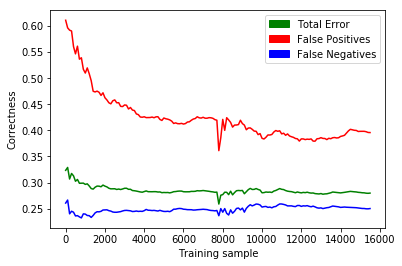

In [27]:
plt.xlabel('Training sample')
plt.ylabel('Correctness')
plt.plot(learning_rate[1], learning_rate[0], color="green")
plt.plot(learning_rate[1], learning_rate[2], color="red")
plt.plot(learning_rate[1], learning_rate[3], color="blue")
green_line = mpatches.Patch(color='green', label='Total Error')
red_line = mpatches.Patch(color='red', label='False Positives')
blue_line = mpatches.Patch(color='blue', label='False Negatives')
plt.legend(handles=[green_line, red_line, blue_line])
plt.show()

Using against the test set:

In [28]:
y_pred = []
score_list = [0]*100
println(5)
print("Evaluating on the test set...")
for test_numb in range(len(X_test)):
    # - Get input:
    X_test[test_numb]
    input_ = X_test[test_numb]
    
    # - Input to the neural net:
    sampleNetwork.getInputAndPropagate(input_)
    
    # - Get the output:
    output = sampleNetwork.returnOutputPlace()
    y_pred.append(output)
    
    # - Compare with the y_train output:
    if y_test[test_numb] == output:
        feedback = 0.5
    else:
        feedback = -0.5
    
    # - Continue learning through the test set?:
    #sampleNetwork.rewardAndUpdate(feedback)
    
    # - Calculate score (% of right answers):
    if feedback == 0.5:
        new_score = 1
    else:
        new_score = 0
    score_list.append(new_score)
    score_list.pop(0)
    
    # - print every 100 turns:
    if test_numb % 100 == 0:
        correctness = np.mean(score_list)
        print(test_numb)
       
        
# Result:
print("Done!")
println(3)
print("Tested network:")
print(sampleNetwork)
print("- Trained for", epochs, "epochs")
print()
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
print()
print("Correct answers in %:", ((cm[0][0]+cm[1][1])/2000.)*100)
print("-  False negatives %:", (cm[0][1] / (cm[0][1]+cm[0][0]))*100)
print("-  False positives %:", (cm[1][0] / (cm[1][1]+cm[1][0]))*100)
print()

 
 
 
 
 
Evaluating on the test set...
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
Done!
 
 
 
Tested network:
NN dims: 11 -> 1x6 -> 2
- Trained for 2 epochs

Confusion matrix:
[[1159  436]
 [ 140  265]]

Correct answers in %: 71.2
-  False negatives %: 27.335423197492165
-  False positives %: 34.5679012345679



Lets compare that with the standard ANN adam learning:

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
epochs_numb = input("Choose the epochs: ")
epochs_numb = int(epochs_numb)
classifier.fit(X_train, y_train, batch_size = 10, epochs = epochs_numb)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("- Trained for", epochs_numb, "epochs")
print()
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
print()
print("Correct answers in %:", ((cm[0][0]+cm[1][1])/2000.)*100)
print("-  False negatives %:", (cm[0][1] / (cm[0][1]+cm[0][0]))*100)
print("-  False positives %:", (cm[1][0] / (cm[1][1]+cm[1][0]))*100)
print()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Choose the epochs: 20
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8000/8000 [==============================] - 1s 87us/step - loss: 0.5047 - acc: 0.7955
Epoch 2/20
8000/8000 [==============================] - 0s 61us/step - loss: 0.4246 - acc: 0.8001
Epoch 3/20
8000/8000 [==============================] - 0s 59us/step - loss: 0.4166 - acc: 0.8279
Epoch 4/20
8000/8000 [==============================] - 0s 55us/step - loss: 0.4116 - acc: 0.8309
Epoch 5/20
8000/8000 [==============================] - 0s 56us/step - loss: 0.4073 - acc: 0.8314
Epoch 6/20
8000/8000 [==============================] - 0s 58us/step - loss: 0.4048 - acc: 0.8327
Epoch 7/20
8000/8000 [==============================] - 0s 58us/step - loss: 0.4023 - acc: 0.8354
Epoch 8/20
8000/8000 [==============================] - 0s 55us/step - loss: 0.4016 - acc: 0.8361
Epoch 9/20
8000/8000 [==============================] - 0s 57us/step - los

The demo classifier trained for 2 epochs:
- Correct answers in %: 71.2
- False negatives %: 27.335423197492165
- False positives %: 34.5679012345679
    
Standard ANN adam trained for 20 epochs:
- Correct answers in %: 84.3
- False negatives %: 3.0094043887147337
- False positives %: 65.67901234567901

# Wine Test
* The file wine.data contains the famuous wine data from:
https://archive.ics.uci.edu/ml/datasets/wine
* There are 13 features, determining 3 classes

Getting the data ready:

In [2]:
# Importing the dataset
dataset = pd.read_csv('wine.data')
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 0].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Initiating and training the demo classifier:

In [15]:
# - Initiating:
input_size   = len(X_test[0])
hidden_count = 1
hidden_size = 6
output_size = 3
print("Creating a network...")
sampleNetwork = Network(input_size,
                        hidden_size,
                        output_size,
                        hidden_count)
print("Done!")
print(sampleNetwork)


# - Training:
epochs = 2


learning_rate = [[],[]]
max_learn = len(X_train)*epochs/2
sampleNetwork.max_EF_resist = max_learn
sampleNetwork.D_resist      = max_learn

for epoch_numb in range(epochs):
    y_pred = []
    score_list = []
    for test_numb in range(len(X_train)):
        # - Get input:
        X_train[test_numb]
        input_ = X_train[test_numb]
        
        # - Input to the neural net:
        sampleNetwork.getInputAndPropagate(input_)
        
        # - Get the output:
        output = sampleNetwork.returnOutputPlace()
        y_pred.append(output)
        
        # - Compare with the y_train output:

        if y_train[test_numb] == output+1:
            feedback =  0.5
        else:
            feedback = -0.5
        
        # - Feedback:
        sampleNetwork.rewardAndUpdate(feedback)
        
        # - Calculate score (% of right answers):
        if feedback > 0:
            new_score = 1
        else:
            new_score = 0
            
        score_list.append(new_score)
        
        # - Every Nth turn:
        Nth_turn = 10
        if test_numb % Nth_turn == 0 and test_numb != 0 and test_numb != Nth_turn:
                
            correctness = np.mean(score_list)
        
            # - Append the learning rate list:
            learning_rate[0].append(correctness)
            try:
                learning_rate[1].append(np.mean(learning_rate[1][-1]+Nth_turn))
            except:
                learning_rate[1].append(0)

Creating a network...
Done!
NN dims: 13 -> 1x6 -> 3


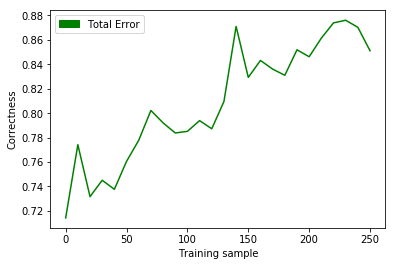

In [5]:
plt.xlabel('Training sample')
plt.ylabel('Correctness')
plt.plot(learning_rate[1], learning_rate[0], color="green")
green_line = mpatches.Patch(color='green', label='Total Error')
plt.legend(handles=[green_line])
plt.show()

Test set:

In [16]:
y_pred = []
score_list = []
println(5)
print("Evaluating on the test set...")
for test_numb in range(len(X_test)):
    # - Get input:
    X_test[test_numb]
    input_ = X_test[test_numb]
    
    # - Input to the neural net:
    sampleNetwork.getInputAndPropagate(input_)
    
    # - Get the output:
    output = sampleNetwork.returnOutputPlace()
    y_pred.append(output)
    
    # - Compare with the y_train output:
    if y_test[test_numb] == output+1:
        feedback = 0.5
    else:
        feedback = -0.5
    
    # - Continue learning through the test set?:
    #sampleNetwork.rewardAndUpdate(feedback)
    
    # - Calculate score (% of right answers):
    if feedback == 0.5:
        new_score = 1
    else:
        new_score = 0
    score_list.append(new_score)
    
    # - print every 100 turns:
    if test_numb % 10 == 0:
        print(test_numb)
       
        
# Result:
print("Done!")
println(3)
print("Tested network:")
print(sampleNetwork)
print("- Trained for", epochs, "epochs")
print()
print("Correct answers on the test set %:", np.mean(score_list)*100)
print()
print("Correct(1) vs Wrong(0) list:")
print(score_list)
print()

 
 
 
 
 
Evaluating on the test set...
0
10
20
30
Done!
 
 
 
Tested network:
NN dims: 13 -> 1x6 -> 3
- Trained for 2 epochs

Correct answers on the test set %: 83.33333333333334

Correct(1) vs Wrong(0) list:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]

